In [2]:
import os
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 50)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

In [3]:
# Cell 2. — Path and memory-aware reading
# Change this path to the full path for City_time_series.csv inside your 'zillow' folder
DATA_PATH = "City_time_series.csv" # <- edit this to your local path

# A quick safeguard to confirm file exists
assert os.path.exists(DATA_PATH), f"File not found: {DATA_PATH}"

# If you have plenty of RAM, you can load directly. If not, use chunksize or select columns.
# Try an initial small read to inspect columns (first 100 rows)
df_sample = pd.read_csv(DATA_PATH, nrows=100)
print("Sample shape:", df_sample.shape)
display(df_sample.head())
print("Columns:", df_sample.columns.tolist())


Sample shape: (100, 81)


,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,MedianRentalPrice_1Bedroom,MedianRentalPrice_2Bedroom,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,aberdeenbinghamid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168400.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,aberdeenharfordmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76000.0,111700.0,141700.0,NaN,109600.0,81300.0,137900.0,109600.0,108600.0,147900.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74500.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,aberdeenmoorenc,NaN,NaN,N

Columns: ['Date', 'RegionName', 'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes', 'MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom', 'MedianListingPricePerSqft_3Bedroom', 'MedianListingPricePerSqft_4Bedroom', 'MedianListingPricePerSqft_5BedroomOrMore', 'MedianListingPricePerSqft_AllHomes', 'MedianListingPricePerSqft_CondoCoop', 'MedianListingPricePerSqft_DuplexTriplex', 'MedianListingPricePerSqft_SingleFamilyResidence', 'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom', 'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom', 'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes', 'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex', 'MedianListingPrice_SingleFamilyResidence', 'MedianPctOfPriceReduction_AllHomes', 'MedianPctOfPriceReduction_CondoCoop', 'MedianPctOfPriceReduction_SingleFamilyResidence', 'MedianPriceCutDollar_AllHomes', 'MedianPriceCutDollar_CondoCoop', 'MedianPriceCutDollar_SingleFamilyRes

In [4]:
# Cell 3. — Full read with parsing dates & dtype optimizations
# Common column names in Zillow files: 'Date', 'RegionName', 'RegionID', 'State', 'City', ...
# We'll parse 'Date' if present. If your dataset has 'Date' spelled differently, adapt.

# Build a dtype map for common columns (adjust depending on sample)
dtype_map = {
    'regionid': 'Int64',    # if present
    'regiontype': 'category',
    'regionname': 'string',
    'state': 'category',
    'city': 'string'
}

# Read full file. Use parse_dates for 'Date' if present (case-insensitive)
date_cols = []
for c in df_sample.columns:
    if c.lower() in ['date', 'yearmonth', 'month', 'timestamp']:
        date_cols.append(c)

print("Detected possible date columns:", date_cols)

# Read with parse_dates if a date column exists
if date_cols:
    df = pd.read_csv(DATA_PATH, parse_dates=date_cols, dtype=dtype_map, low_memory=False)
else:
    df = pd.read_csv(DATA_PATH, dtype=dtype_map, low_memory=False)

print("Full load shape:", df.shape)
display(df.head())
display(df.info(memory_usage='deep'))


Detected possible date columns: ['Date']
Full load shape: (3762566, 81)


,Date,RegionName,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,MedianListingPricePerSqft_CondoCoop,MedianListingPricePerSqft_DuplexTriplex,MedianListingPricePerSqft_SingleFamilyResidence,MedianListingPrice_1Bedroom,MedianListingPrice_2Bedroom,MedianListingPrice_3Bedroom,MedianListingPrice_4Bedroom,MedianListingPrice_5BedroomOrMore,MedianListingPrice_AllHomes,MedianListingPrice_CondoCoop,MedianListingPrice_DuplexTriplex,MedianListingPrice_SingleFamilyResidence,MedianPctOfPriceReduction_AllHomes,MedianPctOfPriceReduction_CondoCoop,MedianPctOfPriceReduction_SingleFamilyResidence,MedianPriceCutDollar_AllHomes,MedianPriceCutDollar_CondoCoop,MedianPriceCutDollar_SingleFamilyResidence,MedianRentalPricePerSqft_1Bedroom,MedianRentalPricePerSqft_2Bedroom,MedianRentalPricePerSqft_3Bedroom,MedianRentalPricePerSqft_4Bedroom,MedianRentalPricePerSqft_5BedroomOrMore,MedianRentalPricePerSqft_AllHomes,MedianRentalPricePerSqft_CondoCoop,MedianRentalPricePerSqft_DuplexTriplex,MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits,MedianRentalPricePerSqft_SingleFamilyResidence,MedianRentalPricePerSqft_Studio,MedianRentalPrice_1Bedroom,MedianRentalPrice_2Bedroom,MedianRentalPrice_3Bedroom,MedianRentalPrice_4Bedroom,MedianRentalPrice_5BedroomOrMore,MedianRentalPrice_AllHomes,MedianRentalPrice_CondoCoop,MedianRentalPrice_DuplexTriplex,MedianRentalPrice_MultiFamilyResidence5PlusUnits,MedianRentalPrice_SingleFamilyResidence,MedianRentalPrice_Studio,ZHVIPerSqft_AllHomes,PctOfHomesDecreasingInValues_AllHomes,PctOfHomesIncreasingInValues_AllHomes,PctOfHomesSellingForGain_AllHomes,PctOfHomesSellingForLoss_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_AllHomes,PctOfListingsWithPriceReductionsSeasAdj_CondoCoop,PctOfListingsWithPriceReductionsSeasAdj_SingleFamilyResidence,PctOfListingsWithPriceReductions_AllHomes,PctOfListingsWithPriceReductions_CondoCoop,PctOfListingsWithPriceReductions_SingleFamilyResidence,PriceToRentRatio_AllHomes,Sale_Counts,Sale_Counts_Seas_Adj,Sale_Prices,ZHVI_1bedroom,ZHVI_2bedroom,ZHVI_3bedroom,ZHVI_4bedroom,ZHVI_5BedroomOrMore,ZHVI_AllHomes,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,abbottstownadamspa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108700.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,aberdeenbinghamid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168400.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,aberdeenharfordmd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76000.0,111700.0,141700.0,NaN,109600.0,81300.0,137900.0,109600.0,108600.0,147900.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,aberdeenmonroems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74500.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,aberdeenmoorenc,NaN,NaN,N

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762566 entries, 0 to 3762565
Data columns (total 81 columns):
 #   Column                                                         Dtype         
---  ------                                                         -----         
 0   Date                                                           datetime64[ns]
 1   RegionName                                                     object        
 2   InventorySeasonallyAdjusted_AllHomes                           float64       
 3   InventoryRaw_AllHomes                                          float64       
 4   MedianListingPricePerSqft_1Bedroom                             float64       
 5   MedianListingPricePerSqft_2Bedroom                             float64       
 6   MedianListingPricePerSqft_3Bedroom                             float64       
 7   MedianListingPricePerSqft_4Bedroom                             float64       
 8   MedianListingPricePerSqft_5BedroomOrMore            

None

In [5]:
# (run this first to free the small sample you loaded earlier)
del df_sample
import gc
gc.collect()

20

In [6]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace(r'[^\w_]', '', regex=True)
)
print("Cleaned column names sample:", df.columns[:40].tolist())

Cleaned column names sample: ['date', 'regionname', 'inventoryseasonallyadjusted_allhomes', 'inventoryraw_allhomes', 'medianlistingpricepersqft_1bedroom', 'medianlistingpricepersqft_2bedroom', 'medianlistingpricepersqft_3bedroom', 'medianlistingpricepersqft_4bedroom', 'medianlistingpricepersqft_5bedroomormore', 'medianlistingpricepersqft_allhomes', 'medianlistingpricepersqft_condocoop', 'medianlistingpricepersqft_duplextriplex', 'medianlistingpricepersqft_singlefamilyresidence', 'medianlistingprice_1bedroom', 'medianlistingprice_2bedroom', 'medianlistingprice_3bedroom', 'medianlistingprice_4bedroom', 'medianlistingprice_5bedroomormore', 'medianlistingprice_allhomes', 'medianlistingprice_condocoop', 'medianlistingprice_duplextriplex', 'medianlistingprice_singlefamilyresidence', 'medianpctofpricereduction_allhomes', 'medianpctofpricereduction_condocoop', 'medianpctofpricereduction_singlefamilyresidence', 'medianpricecutdollar_allhomes', 'medianpricecutdollar_condocoop', 'medianpricecutdo

In [7]:
print("Rows, cols:", df.shape)
dups = df.duplicated().sum()
print("Duplicate rows:", dups)

missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct}).sort_values('missing_pct', ascending=False)
display(missing_df.head(80))

Rows, cols: (3762566, 81)
Duplicate rows: 0


,missing_count,missing_pct
pctofhomessellingforgain_allhomes,3762365,99.99
pctofhomessellingforloss_allhomes,3762365,99.99
medianrentalpricepersqft_5bedroomormore,3761398,99.97
medianrentalprice_5bedroomormore,3761440,99.97
medianrentalpricepersqft_duplextriplex,3756962,99.85
...,...,...
zhvi_singlefamilyresidence,687235,18.27
zhvi_middletier,685018,18.21
zhvi_allhomes,679176,18.05
zhvi_toptier,646807,17.19


In [8]:
# A. Drop very sparse columns (>80% missing)
threshold = 80.0
high_miss_cols = missing_df[missing_df['missing_pct'] > threshold].index.tolist()
print(f"Columns with >{threshold}% missing (count = {len(high_miss_cols)}):")
print(high_miss_cols[:80])   # show first 80 names

# drop them and show new shape
df = df.drop(columns=high_miss_cols, errors='ignore')
print("New shape after dropping sparse cols:", df.shape)

# recompute missing summary to continue
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct}).sort_values('missing_pct', ascending=False)
display(missing_df.head(80))

Columns with >80.0% missing (count = 59):
['pctofhomessellingforgain_allhomes', 'pctofhomessellingforloss_allhomes', 'medianrentalpricepersqft_5bedroomormore', 'medianrentalprice_5bedroomormore', 'medianrentalpricepersqft_duplextriplex', 'medianlistingprice_1bedroom', 'medianlistingpricepersqft_duplextriplex', 'medianlistingpricepersqft_1bedroom', 'medianlistingprice_duplextriplex', 'medianrentalprice_duplextriplex', 'medianrentalpricepersqft_4bedroom', 'medianrentalprice_4bedroom', 'medianrentalprice_condocoop', 'medianrentalpricepersqft_1bedroom', 'medianrentalpricepersqft_condocoop', 'medianrentalpricepersqft_studio', 'medianrentalprice_1bedroom', 'medianrentalprice_studio', 'medianpricecutdollar_condocoop', 'medianpctofpricereduction_condocoop', 'medianlistingprice_5bedroomormore', 'medianrentalpricepersqft_2bedroom', 'pctoflistingswithpricereductionsseasadj_condocoop', 'pctoflistingswithpricereductions_condocoop', 'medianrentalprice_2bedroom', 'medianrentalpricepersqft_3bedroom', 

,missing_count,missing_pct
inventoryraw_allhomes,2990822,79.49
inventoryseasonallyadjusted_allhomes,2990822,79.49
zhvi_condocoop,2938992,78.11
zhvi_5bedroomormore,2937241,78.06
zripersqft_allhomes,2753169,73.17
pricetorentratio_allhomes,2679691,71.22
zri_allhomes,2664399,70.81
zri_singlefamilyresidencerental,2663647,70.79
zri_allhomesplusmultifamily,2661716,70.74
zhvi_2bedroom,1997958,53.10


In [9]:
# A — Impute remaining missing values (numeric -> median, categorical -> mode)
import numpy as np

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category','string']).columns.tolist()

print("Numeric cols:", len(num_cols), "Categorical cols:", len(cat_cols))

# Numeric -> median
for c in num_cols:
    miss = df[c].isnull().sum()
    if miss > 0:
        med = df[c].median()
        df[c] = df[c].fillna(med)

# Categorical -> mode or 'missing'
for c in cat_cols:
    miss = df[c].isnull().sum()
    if miss > 0:
        try:
            mode_val = df[c].mode(dropna=True).iloc[0]
            df[c] = df[c].fillna(mode_val)
        except Exception:
            df[c] = df[c].fillna("missing")

print("Total missing after this imputation:", df.isnull().sum().sum())
# show top missing columns as sanity check
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct}).sort_values('missing_pct', ascending=False)
display(missing_df)


Numeric cols: 20 Categorical cols: 1
Total missing after this imputation: 0


,missing_count,missing_pct
date,0,0.0
regionname,0,0.0
inventoryseasonallyadjusted_allhomes,0,0.0
inventoryraw_allhomes,0,0.0
zhvipersqft_allhomes,0,0.0
pctofhomesdecreasinginvalues_allhomes,0,0.0
pctofhomesincreasinginvalues_allhomes,0,0.0
pricetorentratio_allhomes,0,0.0
zhvi_2bedroom,0,0.0
zhvi_3bedroom,0,0.0


In [10]:
# B — downcast floats/ints
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='float')
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')

print("Dtype counts after downcast:")
display(df.dtypes.value_counts())

Dtype counts after downcast:


float32           20
datetime64[ns]     1
object             1
Name: count, dtype: int64

In [11]:
# C — time features + target selection
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# ensure sorted
df = df.sort_values(['regionname','date']).reset_index(drop=True)

# time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['yearmonth'] = df['date'].dt.to_period('M').astype(str)

# target selection - recommended 'zhvi_allhomes'
target = 'zhvi_allhomes' if 'zhvi_allhomes' in df.columns else df.select_dtypes(include=[np.number]).columns[0]
print("Selected target:", target)
display(df[[ 'date','regionname', target ]].head(8))

Selected target: zhvi_allhomes


,date,regionname,zhvi_allhomes
0,2010-01-31,abbevilleabbevillesc,142500.0
1,2010-02-28,abbevilleabbevillesc,142500.0
2,2010-03-31,abbevilleabbevillesc,142500.0
3,2010-04-30,abbevilleabbevillesc,142500.0
4,2010-05-31,abbevilleabbevillesc,142500.0
5,2010-06-30,abbevilleabbevillesc,142500.0
6,2010-07-31,abbevilleabbevillesc,142500.0
7,2010-08-31,abbevilleabbevillesc,142500.0


In [12]:
# D — lags per region
df = df.sort_values(['regionname', 'date']).reset_index(drop=True)
df[f'{target}_lag1'] = df.groupby('regionname')[target].shift(1)
df[f'{target}_lag12'] = df.groupby('regionname')[target].shift(12)
df[f'{target}_roll3'] = df.groupby('regionname')[target].shift(1).rolling(3, min_periods=1).mean().reset_index(level=0, drop=True)

# drop rows missing lag1 (they are first obs per region)
before = df.shape
df = df.dropna(subset=[f'{target}_lag1']).reset_index(drop=True)
after = df.shape
print(f"Dropped {before[0]-after[0]} rows due to missing {target}_lag1. New shape: {after}")

Dropped 16636 rows due to missing zhvi_allhomes_lag1. New shape: (3745930, 29)


In [13]:
# E — train/test split by time (last 20% months)
min_date = df['date'].min()
max_date = df['date'].max()
total_months = (max_date.year - min_date.year) * 12 + (max_date.month - min_date.month) + 1
test_months = max(1, int(np.ceil(total_months * 0.2)))
cutoff = (max_date.to_period('M') - (test_months-1)).to_timestamp()

train_df = df[df['date'] < cutoff].reset_index(drop=True)
test_df  = df[df['date'] >= cutoff].reset_index(drop=True)
print("Date range:", min_date.date(), "to", max_date.date(), f"({total_months} months).")
print("Test months:", test_months, "Cutoff:", cutoff.date())
print("Train shape:", train_df.shape, "Test shape:", test_df.shape)

Date range: 1996-05-31 to 2017-12-31 (260 months).
Test months: 52 Cutoff: 2013-09-01
Train shape: (2888110, 29) Test shape: (857820, 29)


In [14]:
# F — Save cleaned files
OUT_DIR = r"C:\Users\HP\Desktop\Reality_AI\zillow"   # ✅ Updated path

import os
os.makedirs(OUT_DIR, exist_ok=True)

# Save cleaned and split datasets
df.to_csv(os.path.join(OUT_DIR, "city_time_series_cleaned_with_lags.csv"), index=False)
train_df.to_csv(os.path.join(OUT_DIR, "city_time_series_train.csv"), index=False)
test_df.to_csv(os.path.join(OUT_DIR, "city_time_series_test.csv"), index=False)

# Optional: sample file for testing smaller uploads
sample_n = min(100000, len(df))
df.sample(n=sample_n, random_state=42).to_csv(os.path.join(OUT_DIR, "city_time_series_sample.csv"), index=False)

print("✅ Saved cleaned & split files to:", OUT_DIR)


✅ Saved cleaned & split files to: C:\Users\HP\Desktop\Reality_AI\zillow


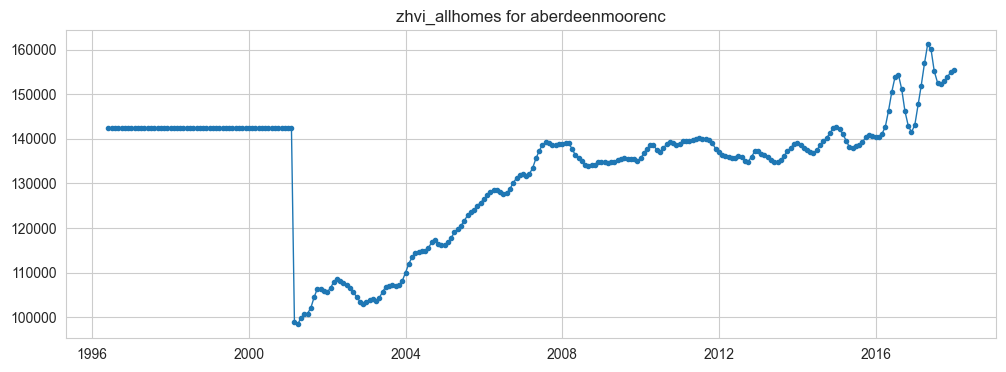

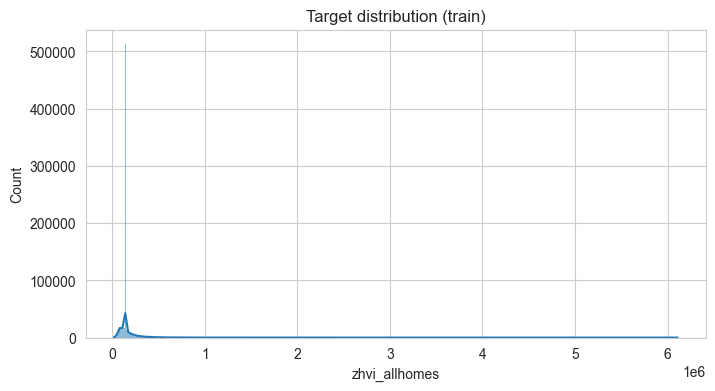

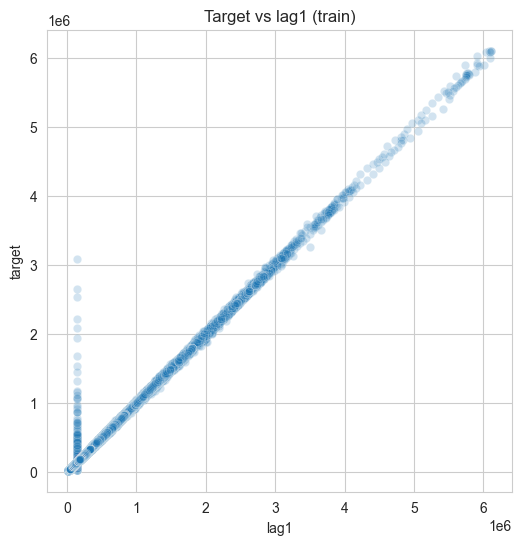

In [20]:
# G — a few quick visual checks (run after saving)
import matplotlib.pyplot as plt
import seaborn as sns

# 1) sample city time series
sample_city = df['regionname'].value_counts().index[0]
city_ts = df[df['regionname']==sample_city].sort_values('date')
plt.figure(figsize=(12,4)); plt.plot(city_ts['date'], city_ts[target], marker='.', linewidth=1); plt.title(f"{target} for {sample_city}"); plt.show()

# 2) target distribution in train set
plt.figure(figsize=(8,4)); sns.histplot(train_df[target].dropna(), kde=True); plt.title('Target distribution (train)'); plt.show()

# 3) check the lag correlation (target vs lag1)
plt.figure(figsize=(6,6)); sns.scatterplot(x=train_df[f'{target}_lag1'], y=train_df[target], alpha=0.2); plt.xlabel('lag1'); plt.ylabel('target'); plt.title('Target vs lag1 (train)'); plt.show()